# GJR-GARCH Model Demo

This notebook demonstrates how to use the GJR-GARCH model for simulating financial returns with asymmetric volatility.

**Requirements**: `pip install finsimtorch[examples]`


Using device: mps
Simulated 1000 paths, shape: torch.Size([100, 1000])


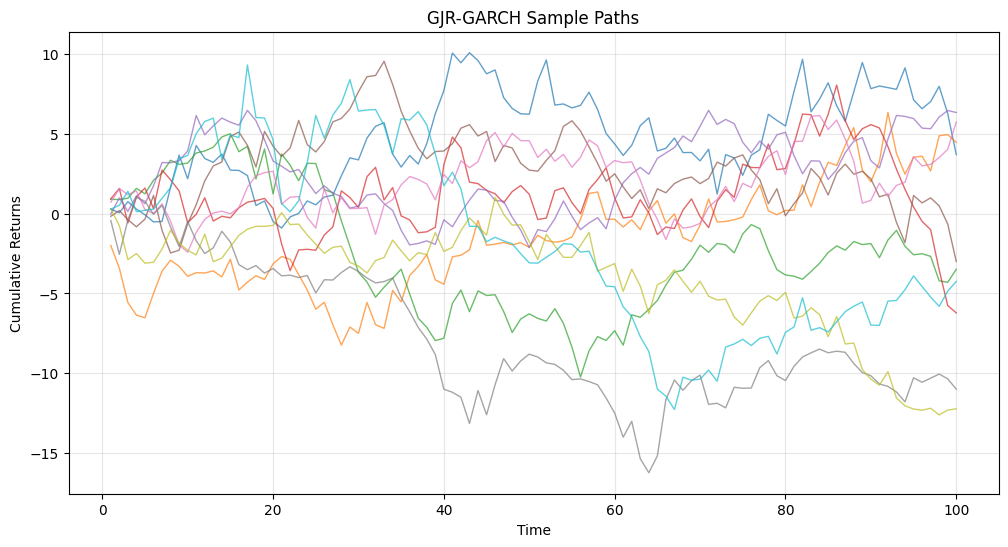

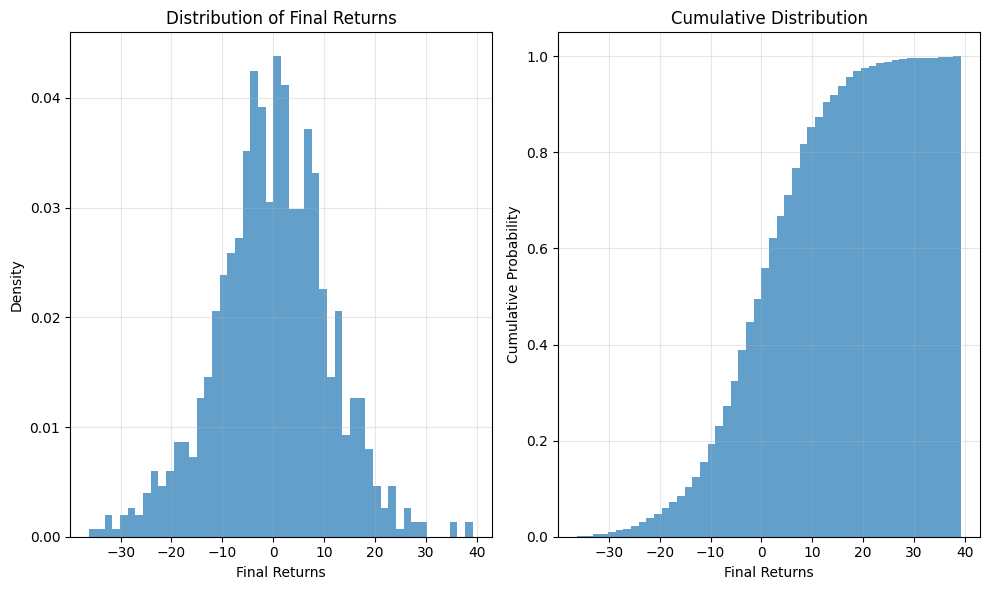

Statistics: Mean=-0.116, Std=11.029
Skewness=-0.076, Kurtosis=0.493


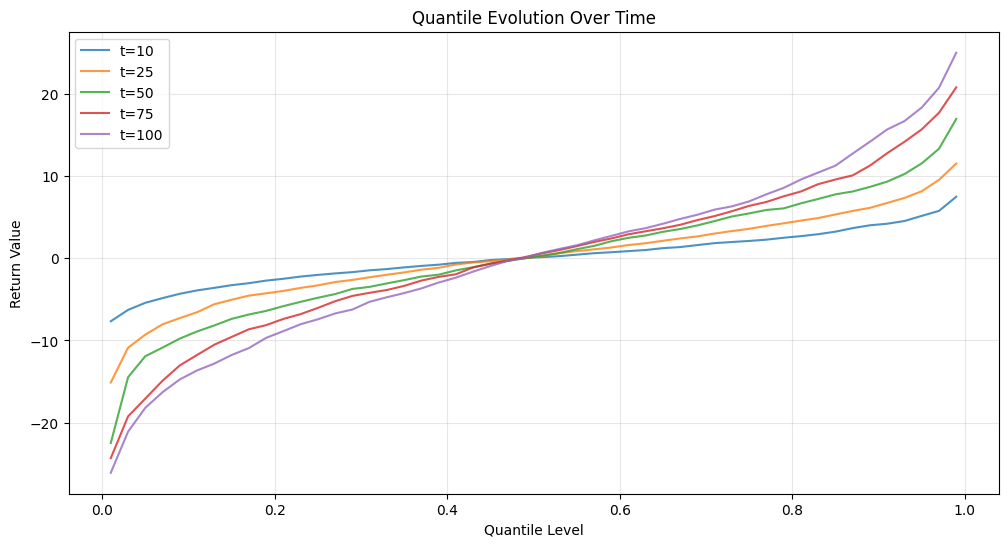

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from finsimtorch import GjrGarch

# Auto-detect best device
device = 'cuda' if torch.cuda.is_available() else 'mps' if hasattr(torch.backends, 'mps') and torch.backends.mps.is_available() else 'cpu'
print(f"Using device: {device}")

# Create GJR-GARCH model
model = GjrGarch(
    mu=0.0, omega=0.1, alpha=0.1, gamma=0.05, beta=0.8,
    initial_variance=1.0, device=device
)

# Simulate paths using range (memory efficient!)
num_paths = 1000
time_points = range(1, 101)  # 100 time steps
returns = model.paths(time_points, num_paths)

print(f"Simulated {num_paths} paths, shape: {returns.shape}")

# Plot sample paths
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(time_points, returns[:, i].cpu().numpy(), alpha=0.7, linewidth=1)
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('GJR-GARCH Sample Paths')
plt.grid(True, alpha=0.3)
plt.show()

# Plot final returns distribution
final_returns = returns[-1, :].cpu().numpy()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(final_returns, bins=50, alpha=0.7, density=True)
plt.xlabel('Final Returns')
plt.ylabel('Density')
plt.title('Distribution of Final Returns')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(final_returns, bins=50, alpha=0.7, density=True, cumulative=True)
plt.xlabel('Final Returns')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
final_returns_tensor = returns[-1, :]
mean_val = final_returns_tensor.mean()
std_val = final_returns_tensor.std()
# Calculate skewness and kurtosis manually
centered = final_returns_tensor - mean_val
skewness = (centered ** 3).mean() / (std_val ** 3)
kurtosis = (centered ** 4).mean() / (std_val ** 4) - 3
print(f"Statistics: Mean={mean_val:.3f}, Std={std_val:.3f}")
print(f"Skewness={skewness:.3f}, Kurtosis={kurtosis:.3f}")

# Quantiles
quantile_times = [10, 25, 50, 75, 100]
quantiles = model.quantiles(quantile_times, num_paths, lo=0.01, hi=0.99, size=50)

plt.figure(figsize=(12, 6))
for i, t in enumerate(quantile_times):
    q_levels = np.linspace(0.01, 0.99, 50)
    plt.plot(q_levels, quantiles[i].cpu().numpy(), label=f't={t}', alpha=0.8)

plt.xlabel('Quantile Level')
plt.ylabel('Return Value')
plt.title('Quantile Evolution Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
